# 02: Cleaning & Exploratory Data Analysis
---

## 1. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

pd.options.display.max_colwidth = 400

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

---
## 2. Data

In [2]:
plant_based = pd.read_csv('../data/plant_based.csv')
paleo = pd.read_csv('../data/paleo.csv')

In [3]:
plant_based.head()

,subreddit,title,selftext,created_utc
0,PlantBasedDiet,I'm having so many health problems from this diet,"**Warning, long post ahead** Okay so I had a heart attack in 2020. I have constant angina every day. I'm desperate to find a diet to alleviate my pain if its possible, especially since I'm looking at open heart surgery. I decided to give this plant based lifestyle a chance 6 months ago of eating nothing but whole plant foods and cutting out all the junk even though I was already vegan for a y...",1652222200
1,PlantBasedDiet,Mercy For Animals encourages White House support of plant-based diet,NaN,1652215236
2,PlantBasedDiet,Struggling with social &amp; familial stigma/backlash/contempt,[removed],1652215221
3,PlantBasedDiet,Ideas for lunch to take to uni,[removed],1652213780
4,PlantBasedDiet,$10-25k grants to promote climate-friendly plant-based diet from Eat the Change,Not sure if this is the best sub but I saw that this looks like a cool opportunity for those interested in promoting plant-based eating: [https://eatthechange.org/](https://eatthechange.org/),1652210182


In [4]:
paleo.head()

,subreddit,title,selftext,created_utc
0,Paleo,"This is my meal for the day. Let me hope that I don't get charged with ""bird genocide"".",NaN,1652208666
1,Paleo,Coconut/Cassava/Arrowroot flours in Shakes for more carbs? Which one?,"I am working out like crazy and need to up my carbs to stay afloat. I am on low-lectin diet while also severely limiting sugars/fruits, so I am basically down to sweet potatoes and yams as high carb sources. I was thinking of adding in some powdered carb sources to my daily smoothie. \n\n1/4 cup of Arrowroot Flour has 26g of carbs, zero sugar, zero protein, and zero fiber...\n\n1/4 cup of Cass...",1652205599
2,Paleo,"I’ve been using monk fruit sweetener for everything, has anyone noticed this effecting weight loss?",NaN,1652204018
3,Paleo,Grain free UNSWEETENED granola I can buy? Recommendations?,NaN,1652203919
4,Paleo,"Bananas! They aren’t paleo bc of the sugar content, but honey and maple syrup is?! Can someone explain…?",NaN,1652203879


In [5]:
plant_based.isnull().sum()

subreddit         0
title             0
selftext       2306
created_utc       0
dtype: int64

In [6]:
paleo.isnull().sum()

subreddit         0
title             0
selftext       2130
created_utc       0
dtype: int64

The selftext feature is missing over 40% of the values in both datasets, and they cannot be imputed. The created_utc feature is not missing any values, but it is no longer useful as the time of submission is not relevant. As a result, the features will be dropped.

In [7]:
# Dropping the selftext and created_utc features for each dataset

plant_based = plant_based.drop(columns = ['selftext', 'created_utc'])
paleo = paleo.drop(columns = ['selftext', 'created_utc'])

---
## 3. EDA (Part 1): Character & Word Counts

In [8]:
# Adding 'title_char_count' and 'title_word_count' columns to each of the datasets

plant_based['title_char_count'] = plant_based['title'].map(len)
plant_based['title_word_count'] = plant_based['title'].map(lambda x: len(x.split(' ')))

paleo['title_char_count'] = paleo['title'].map(len)
paleo['title_word_count'] = paleo['title'].map(lambda x: len(x.split(' ')))

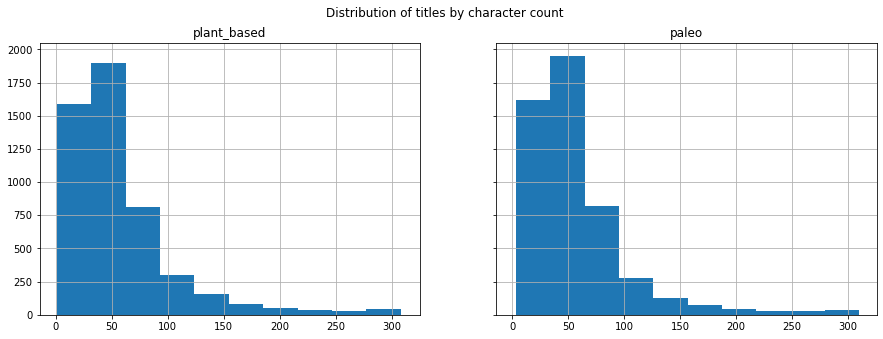

In [10]:
# Distribution of titles by character count

fig, axs = plt.subplots(1, 2, figsize = (15, 5), sharey = True, sharex = True)

a = plant_based['title_char_count'].hist(ax = axs[0])
b = paleo['title_char_count'].hist(ax = axs[1])

a.set(title = 'plant_based')
b.set(title = 'paleo')

fig.suptitle('Distribution of titles by character count');

The distribution of titles by character count are almost identical between both datasets. Both are unimodal and right-skewed, with the majority of titles in the under 60 characters range. Both datasets have titles with as many as 300 characters.

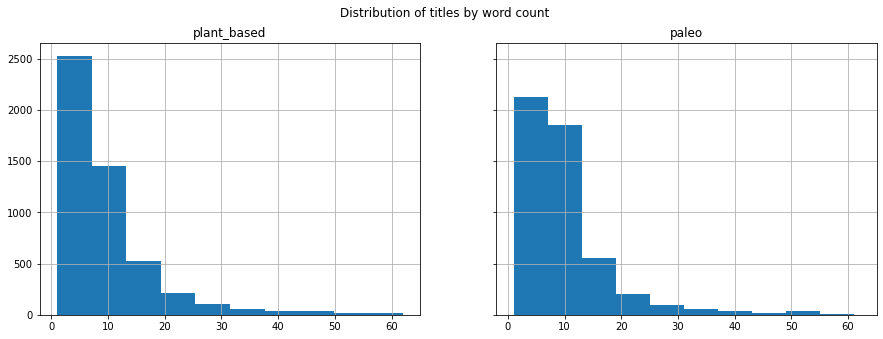

In [11]:
# Distribution of titles by word count

fig, axs = plt.subplots(1, 2, figsize = (15, 5), sharey = True, sharex = True)

a = plant_based['title_word_count'].hist(ax = axs[0])
b = paleo['title_word_count'].hist(ax = axs[1])

a.set(title = 'plant_based')
b.set(title = 'paleo')

fig.suptitle('Distribution of titles by word count');

The distribution of titles by word count are once again similar between the datasets, but they do vary a bit more. The distributions remain unimodal and right-skewed, with the majority of titles in the under 12 words range. Both datasets have titles with as many as 60 words.

In [12]:
print('Total characters in the plant_based DataFrame: ' + str(plant_based['title_char_count'].sum()))
print('Total words in the plant_based DataFrame: ' + str(plant_based['title_word_count'].sum()))
plant_based.describe()

Total characters in the plant_based DataFrame: 287269
Total words in the plant_based DataFrame: 49337


,title_char_count,title_word_count
count,4999.000000,4999.000000
mean,57.465293,9.869374
std,48.170303,8.608181
min,1.000000,1.000000
25%,28.000000,4.000000
50%,44.000000,7.000000
75%,69.000000,12.000000
max,308.000000,62.000000


In [13]:
print('Total characters in the paleo DataFrame: ' + str(paleo['title_char_count'].sum()))
print('Total words in the paleo DataFrame: ' + str(paleo['title_word_count'].sum()))
paleo.describe()

Total characters in the paleo DataFrame: 283772
Total words in the paleo DataFrame: 47356


,title_char_count,title_word_count
count,4998.000000,4998.000000
mean,56.777111,9.474990
std,44.966832,7.931622
min,3.000000,1.000000
25%,29.000000,5.000000
50%,45.000000,7.000000
75%,69.000000,11.000000
max,310.000000,61.000000


The total number of characters and words are comparable between the datasets, though the plant-based dataset has about 3,500 more characters and 2,000 more words. Despite this, the character and word means are about the same. These added features are not likely to aid in classifying between the diets.

---
## 4. Cleaning

* Removing URLs, special characters, emojis, punctuation and digits
* Mapping subreddit names to binary values

### 4.1. plant_based

In [14]:
# Searching for URLs that end in .com

plant_based.loc[plant_based['title'].str.contains('.com', regex=False)]

,subreddit,title,title_char_count,title_word_count
447,PlantBasedDiet,Chocolate chip cookies! So good! 🍪 https://veggiekinsblog.com/2020/05/,70,7
526,PlantBasedDiet,We have you covered when it comes to plant-based copy cats.. Check our vegan lasagna recipe👇 https://www.theplantpowerpeople.com/lasagna,136,17
1387,PlantBasedDiet,"Fast food is getting more interesting. We can get plant based meat at KFC, Burger King and now Pizza Hut too! https://essfeed.com/f/pizza-hut-adds-beyond-meat-sausage",166,22
1821,PlantBasedDiet,https://beautifulingredient.com/quinoa-bacon-bits/,50,1
1893,PlantBasedDiet,Complementary plant based recipes for the holidays! Hope you all enjoy them. www.marriedtohealth.com,100,13
2437,PlantBasedDiet,Absolutely love the memes that debug your brain is creating on his IG account at the moment https://instagram.com/debugyourbrain?utm_medium=copy_link,149,18
2670,PlantBasedDiet,https://barefeetinthekitchen.com/simple-homemade-chocolate-sauce/#wprm-recipe-container-22065. Pumpkin oatmeal cookies with chocolate sauce icing 😋,147,9
3108,PlantBasedDiet,sucavu.com/?wa=Koken,20,1
3445,PlantBasedDiet,"Rice and peas with an oil free, summer legume salad on the side. Please follow my Instagram if you like this food! https://instagram.com/plant.based.pigs?utm_medium=copy_link",174,23
4167,PlantBasedDiet,"Chocolate Pudding Pie (recipe is from plantbasedcookingshow.com) Crust:1c dates, 1/2c cocoa, 1.5c almond meal. Filling: 14oz silken tofu, 1c dates, 3/4c cocoa, 1tsp vanilla, 1c raw cashews, 1/2c plant based milk. I used berries on top instead of toasted coconut! Highly recommend this website!",293,44


In [15]:
# Searching for URLs that end in .org

plant_based.loc[plant_based['title'].str.contains('.org', regex=False)]

,subreddit,title,title_char_count,title_word_count
2176,PlantBasedDiet,MUST check out. Smarty Plants recipes made eating plant based actually delicious. Quit the processed foods and try this out https://smartyplants.org/blog,153,21
4663,PlantBasedDiet,NutritionFacts.org Live Q&amp;A Browser,39,4


*NOTE: Additional extensions were searched, but there were no results. Only .com and .org extensions 
needed to be removed.*

In [16]:
# Removing URLs

plant_based['title'] = plant_based['title'].str.replace('[^ ]+\.com[^ ]+', '')
plant_based['title'] = plant_based['title'].str.replace('[^ ]+\.com', '')
plant_based['title'] = plant_based['title'].str.replace('[^ ]+\.org[^ ]+', '')
plant_based['title'] = plant_based['title'].str.replace('[^ ]+\.org', '')

In [17]:
# Removing special characters, punctuation, digits and emojis

plant_based['title'] = plant_based['title'].str.replace('[^a-zA-Z]', ' ')

In [ ]:
# Mapping subreddit names to binary values

plant_based['subreddit'] = plant_based['subreddit'].map({'PlantBasedDiet' : 0})

In [18]:
# Checking for null values

plant_based.isnull().sum()

subreddit           0
title               0
title_char_count    0
title_word_count    0
dtype: int64

### 4.2. paleo

In [19]:
# Searching for URLs that end in .com

paleo.loc[paleo['title'].str.contains('.com', regex=False)]

,subreddit,title,title_char_count,title_word_count
1998,Paleo,LOVE www.Factor75.com ($40 Off and Free Shipping!),50,7
2257,Paleo,"Kho Sim Số Đẹp Giá Rẻ, Uy Tín Lớn Nhất Việt Nam | KhoSim.com",60,14
4038,Paleo,Ginger scallion sauce https://paleogirl99.com/2015/03/17/ginger-scallion-sauce/,79,4
4353,Paleo,Are you committed to healthy/clean eating and want to take an online survey for a chance to win a $50 Amazon.com gift card?,123,23
4689,Paleo,[BLOGSPAM] Presenting you- THE PRIMAL MILLENNIAL https://www.theprimalmillennial.com,84,7


In [20]:
# Searching for URLs that end in .org

paleo.loc[paleo['title'].str.contains('.org', regex=False)]

,subreddit,title,title_char_count,title_word_count
3105,Paleo,Higher Cholesterol Is Associated With Longer Life - Mission.org - Medium,72,11


*NOTE: Again, additional extensions were searched, but there were no results. Only .com and .org extensions 
needed to be removed.*

In [21]:
# Removing URLs

paleo['title'] = paleo['title'].str.replace('[^ ]+\.com[^ ]+', '')
paleo['title'] = paleo['title'].str.replace('[^ ]+\.com', '')
paleo['title'] = paleo['title'].str.replace('[^ ]+\.org[^ ]+', '')
paleo['title'] = paleo['title'].str.replace('[^ ]+\.org', '')

In [22]:
# Removing special characters, punctuation, digits and emojis

paleo['title'] = paleo['title'].str.replace('[^a-zA-Z]', ' ')

In [ ]:
# Mapping subreddit names to binary values

paleo['subreddit'] = paleo['subreddit'].map({'Paleo' : 1})

In [23]:
# Checking for null values

paleo.isnull().sum()

subreddit           0
title               0
title_char_count    0
title_word_count    0
dtype: int64

---
## 5. EDA (Part 2): Unigrams & Bigrams

In [24]:
# Extending the list of stopwords based on findings in this EDA portion

stopwords = stopwords.words('english')
new_stop_words = ['amp']
stopwords.extend(new_stop_words)

### 5.1. plant_based

In [25]:
# Unigrams

pb_cvec = CountVectorizer(lowercase=True,
                          analyzer='word',
                          stop_words=stopwords)

plant_based_cvec = pb_cvec.fit_transform(plant_based['title'])

plant_based_cvec_df = pd.DataFrame(plant_based_cvec.todense(), columns = pb_cvec.get_feature_names_out())

In [26]:
plant_based_cvec_df.shape

(4999, 5972)

The CountVectorizer identified 5,972 distinct unigrams in the plant-based dataset after removing the stopwords.

In [27]:
plant_based_cvec_df.sum().sort_values(ascending=False).head(15)

plant      690
based      646
diet       386
vegan      384
wfpb       260
food       198
recipe     187
anyone     171
recipes    168
eat        168
help       147
protein    143
eating     132
healthy    131
beans      130
dtype: int64

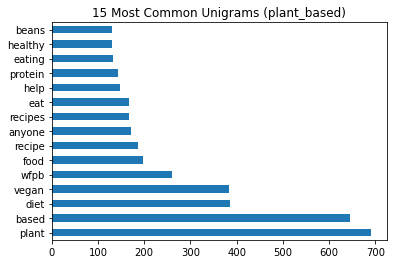

In [47]:
plant_based_cvec_df.sum().sort_values(ascending = False).head(15).plot(kind='barh', 
                                                                       title='15 Most Common Unigrams (plant_based)');

The top 15 plant-based unigrams are not very interesting. They're either obviously referring to a plant-based diet or are general diet terms. 

In [29]:
# Bigrams

pb_cvec2 = CountVectorizer(lowercase=True,
                          analyzer='word',
                          stop_words=stopwords,
                          ngram_range = (2, 2))

plant_based_cvec2 = pb_cvec2.fit_transform(plant_based['title'])

plant_based_cvec_df2 = pd.DataFrame(plant_based_cvec2.todense(), columns = pb_cvec2.get_feature_names_out())

In [30]:
plant_based_cvec_df2.shape

(4999, 21015)

The CountVectorizer identified 21,015 distinct bigrams in the plant-based dataset after removing the stopwords.

In [31]:
plant_based_cvec_df2.sum().sort_values(ascending=False).head(15)

plant based        624
based diet         145
weight loss         47
wfpb diet           42
sweet potato        40
health benefits     33
whole food          31
oil free            29
anyone else         27
lose weight         26
recipe comments     24
high protein        24
food plant          23
first time          22
black bean          21
dtype: int64

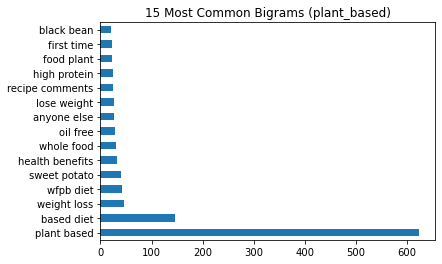

In [48]:
plant_based_cvec_df2.sum().sort_values(ascending = False).head(15).plot(kind='barh', 
                                                                        title='15 Most Common Bigrams (plant_based)');

The top 15 plant-based bigrams aren't all that interesting either. Again, they're either obviously referring to a plant-based diet or are general diet terms.

Based on these unigram and bigram findings, it's uncertain how accurately the model will be able to distinguish whether or not a submission is plant-based if obvious terms aren't included.

### 5.2. paleo

In [33]:
# Unigrams

p_cvec = CountVectorizer(lowercase=True, 
                         analyzer='word', 
                         stop_words=stopwords)

paleo_cvec = p_cvec.fit_transform(paleo['title'])

paleo_cvec_df = pd.DataFrame(paleo_cvec.todense(), columns = p_cvec.get_feature_names_out())

In [34]:
paleo_cvec_df.shape

(4998, 5582)

The CountVectorizer identified 5,582 distinct unigrams in the paleo dataset after removing the stopwords. This is about 400 less than were identified in the plant-based dataset.

In [35]:
paleo_cvec_df.sum().sort_values(ascending=False).head(15)

paleo         1756
question       586
food           519
diet           424
pic            381
recipe         342
keto           282
chicken        216
weight         188
discussion     168
free           167
eating         164
meal           161
eat            158
blogspam       152
dtype: int64

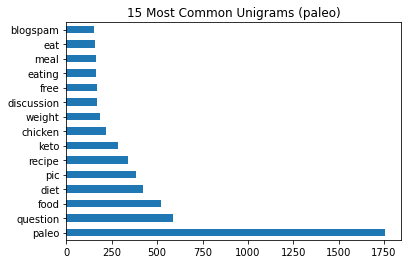

In [49]:
paleo_cvec_df.sum().sort_values(ascending = False).head(15).plot(kind='barh', 
                                                                 title='15 Most Common Unigrams (paleo)');

The top 15 paleo unigrams also include general diet terms but include a couple that are likely to set many of the submissions apart from the plant-based submissions, such as keto and chicken.

In [37]:
# Bigrams

p_cvec2 = CountVectorizer(lowercase=True,
                          analyzer='word',
                          stop_words=stopwords,
                          ngram_range = (2, 2))

paleo_cvec2 = p_cvec2.fit_transform(paleo['title'])

paleo_cvec_df2 = pd.DataFrame(paleo_cvec2.todense(), columns = p_cvec2.get_feature_names_out())

In [38]:
paleo_cvec_df2.shape

(4998, 18833)

The CountVectorizer identified 18,833 distinct bigrams in the paleo dataset after removing the stopwords.

In [39]:
paleo_cvec_df2.sum().sort_values(ascending=False).head(15)

food pic          366
paleo diet        186
weight loss        90
low carb           70
keto paleo         65
sweet potato       63
paleo friendly     44
grass fed          38
paleo keto         37
lose weight        37
new paleo          37
gluten free        36
question paleo     35
bone broth         33
sweet potatoes     31
dtype: int64

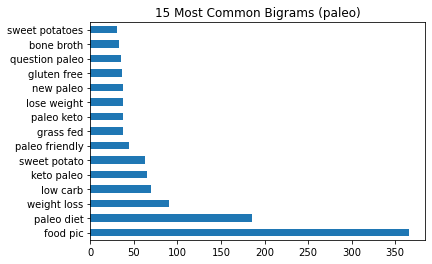

In [40]:
paleo_cvec_df2.sum().sort_values(ascending = False).head(15).plot(kind='barh', 
                                                                  title='15 Most Common Bigrams (paleo)');

The top 15 paleo bigrams get more interesting. They include terms such as low carb, grass fed, gluten free and bone broth.

Based on these unigram and bigram findings, it seems like the paleo submissions may have a better chance at being identified correctly. 

---
## 6. Concatenating DataFrames & Saving to a CSV

In [50]:
diets = pd.concat([plant_based, paleo], axis=0).reset_index().drop(columns=['index',
                                                                            'title_char_count',
                                                                            'title_word_count'])

The title_char_count and title_word_count features were being dropped as they didn't seem like features that would make much of a contribution, given that they were too similar.

In [51]:
diets

,subreddit,title
0,0,I m having so many health problems from this diet
1,0,Mercy For Animals encourages White House support of plant based diet
2,0,Struggling with social amp familial stigma backlash contempt
3,0,Ideas for lunch to take to uni
4,0,k grants to promote climate friendly plant based diet from Eat the Change
...,...,...
9992,1,How can I eat paleo when you re a teen and you re parents buy the food you eat
9993,1,Battle of the Proteins Taking on the supplement industry titans These small Crickets pack a powerful punch Natural Paleo Wholefood that s definitely worthy of the title super food
9994,1,Food Pic Roasted herb chicken chicken gizzard potato skins with green onions sour cream amp cheese saut ed mushrooms spinach with olive oil cooked with olive oil and avocado oil
9995,1,Question Gut bacteria Paleo


In [42]:
diets.to_csv('../data/diets.csv', index=False)